In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets._samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from collections import Counter


In [21]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    x, y = make_blobs(
        n_samples=numSamples,
        centers=centroidLocation,
        cluster_std=clusterDeviation
    )
    x = StandardScaler().fit_transform(x)
    return x, y

In [24]:
x,y = createDataPoints([[4,3],[2,-1],[-1,4]],1500,0.5)
print(x)
print(y)

[[ 1.12774114  0.58581384]
 [ 0.37918684 -1.69048611]
 [ 0.10184625 -1.23513709]
 ...
 [-1.15781387  0.93072516]
 [-0.12128306 -1.20536902]
 [-0.36819383 -1.53318444]]
[0 1 1 ... 2 1 1]


In [27]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(x)
labels = db.labels_
labels

array([0, 1, 1, ..., 2, 1, 1], shape=(1500,))

In [ ]:
n_points = len(labels)
n_noise = np.sum(labels == -1)

unique_clusters = set(labels)
unique_clusters.discard(-1)
n_clusters = len(unique_clusters)

print(f"Total points: {n_points}")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Total points: 1500
Number of clusters: 3
Number of noise points: 1


In [30]:
cluster_counts = Counter(labels)

for label, count in cluster_counts.items():
    if label == -1:
        print(f"Noise points: {count}")
    else:
        print(f"Cluster {label}: {count} points")

Cluster 0: 500 points
Cluster 1: 499 points
Cluster 2: 500 points
Noise points: 1


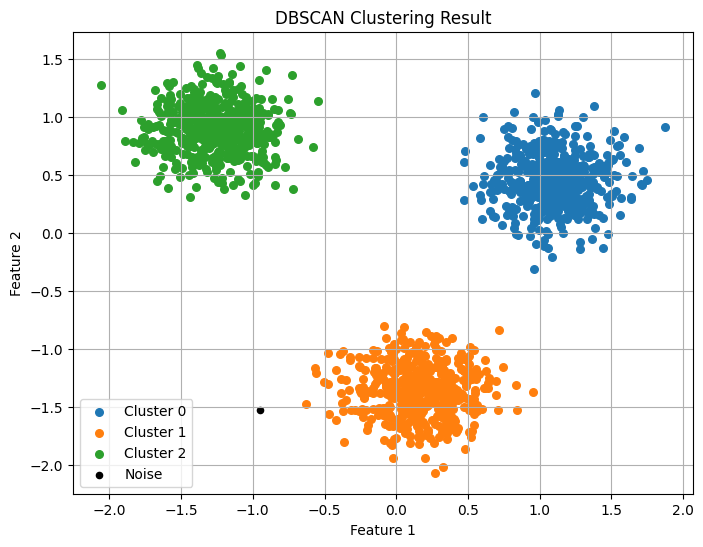

In [31]:
plt.figure(figsize=(8, 6))

unique_labels = set(labels)

for label in unique_labels:
    mask = labels == label
    if label == -1:
        plt.scatter(
            x[mask, 0],
            x[mask, 1],
            c='black',
            s=20,
            label='Noise'
        )
    else:
        plt.scatter(
            x[mask, 0],
            x[mask, 1],
            s=30,
            label=f'Cluster {label}'
        )

plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()